In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def inverse_Boltzmann(property,a,b,c,d):
    temp = c - d * np.log((b-a)/(property-a) - 1)
    return temp

def Boltzmann(temp, a, b, c, d):
    property = a + ((b - a) / (1 + np.exp((c - temp)/d)))
    return property



Tt60J is -33.003050235392976 C


Text(0, 0.5, 'Impact Energy (J)')

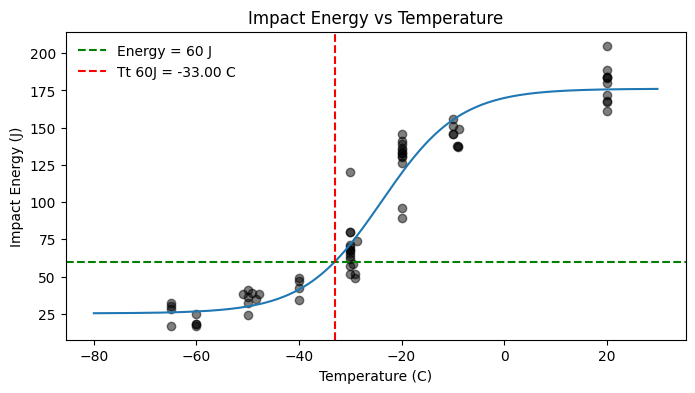

In [3]:
# Tt60J

# read excel file
df = pd.read_excel('Charpy_results_combined.xlsx', engine='openpyxl')
temperature = df['Temperature (C)'].to_numpy()
energy = df['Impact Energy (J)'].to_numpy()

# Boltzmann fitting parameters
a = 25.2953
b = 176.13
c = -23.8415
d = 7.5851

Tt60J = inverse_Boltzmann(60, a,b,c,d)
print(f"Tt60J is {Tt60J} C")

tempRange = np.arange(-80, 30, 0.1)
absorbedEnergyVSTempCurve = Boltzmann(tempRange, a,b,c,d)


plt.figure(figsize=(8, 4))
plt.plot(tempRange, absorbedEnergyVSTempCurve)
plt.scatter(temperature, energy, color='k', marker='o', alpha=0.5)
plt.axhline(y=60, color='g', linestyle='--', label=f'Energy = 60 J')
plt.axvline(x=Tt60J, color='r', linestyle='--', label=f'Tt 60J = {Tt60J:.2f} C')
plt.legend(frameon=False)
plt.title('Impact Energy vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Impact Energy (J)')

    

energy upper shelf is 176.00543977667292 J
Tt50perUS is -26.42272738715374 C


Text(0, 0.5, 'Impact Energy (J)')

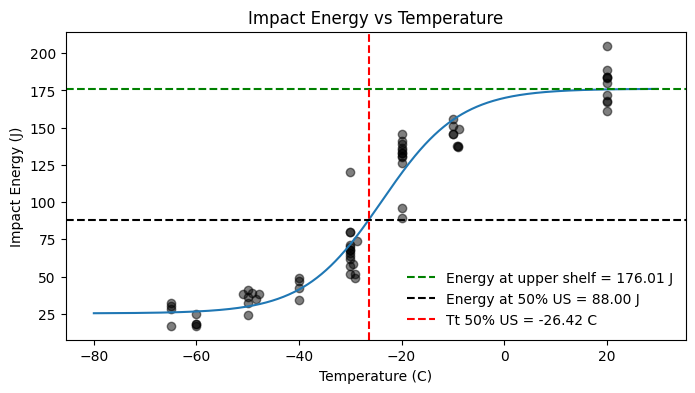

In [4]:
# Tt50perUS

# read excel file
df = pd.read_excel('Charpy_results_combined.xlsx', engine='openpyxl')
temperature = df['Temperature (C)'].to_numpy()
energy = df['Impact Energy (J)'].to_numpy()

# Upper shelf temperature is taken slightly higher than 20C

temperatureUpperShelf = 30

# Boltzmann fitting parameters
a = 25.2953
b = 176.13
c = -23.8415
d = 7.5851

# Energy at upper shelf temperature
energyUpperShelf = Boltzmann(temperatureUpperShelf, a,b,c,d)
print(f"energy upper shelf is {energyUpperShelf} J")

# Transition temperature at 50% of energy at upper shelf temperature

Tt50perUS = inverse_Boltzmann(energyUpperShelf*0.5, a,b,c,d)
print(f"Tt50perUS is {Tt50perUS} C")

tempRange = np.arange(-80, 30, 0.1)
absorbedEnergyVSTempCurve = Boltzmann(tempRange, a,b,c,d)

plt.figure(figsize=(8, 4))
plt.plot(tempRange, absorbedEnergyVSTempCurve)
plt.scatter(temperature, energy, color='k', marker='o', alpha=0.5)

plt.axhline(y=energyUpperShelf, color='g', linestyle='--', label=f'Energy at upper shelf = {energyUpperShelf:.2f} J')
plt.axhline(y=energyUpperShelf*0.5, color='k', linestyle='--', label=f'Energy at 50% US = {energyUpperShelf*0.5:.2f} J')
plt.axvline(x=Tt50perUS, color='r', linestyle='--', label=f'Tt 50% US = {Tt50perUS:.2f} C')

plt.legend(loc=4, frameon=False)
plt.title('Impact Energy vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Impact Energy (J)')

In [5]:
# # read excel file
# df = pd.read_excel('Charpy_results_noNAN.xlsx', engine='openpyxl')
# temperature = df['Temperature (C)'].to_numpy()
# shear = df['Percentage of ductile fracture (%)'].to_numpy()

# df['Lateral expansion (mm)'] = df['Thickness after the test (mm)'] - df['Thickness before the test (mm)']
# df['Impact toughness (J/mm2)'] = df['Impact Energy (J)'] / (df['Thickness before the test (mm)'] * df['Width before the test (mm)'])
# df.to_excel('Charpy_results_noNAN.xlsx', index=False)

Tt50perSFA is -26.42272738715374 C


Text(0, 0.5, 'Percentage of ductile fracture (%)')

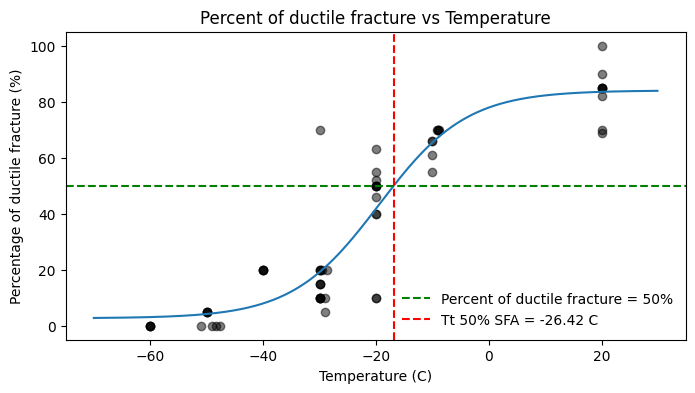

In [6]:
# Tt50perSFA

# read excel file
df = pd.read_excel('Charpy_results_noNAN.xlsx', engine='openpyxl')
temperature = df['Temperature (C)'].to_numpy()
shear = df['Percentage of ductile fracture (%)'].to_numpy()

# Upper shelf temperature is taken slightly higher than 20C

tempRange = np.arange(-70, 30, 0.1)

a = 2.6602
b = 84.0315
c = -19.4031
d = 7.7304

ductileFractureVSTempCurve = Boltzmann(tempRange,a,b,c,d)

Tt50perSFA = inverse_Boltzmann(50, a,b,c,d)
print(f"Tt50perSFA is {Tt50perUS} C")

plt.figure(figsize=(8, 4))
plt.scatter(temperature, shear, color='k', marker='o', alpha=0.5)
plt.plot(tempRange, ductileFractureVSTempCurve)
plt.axhline(y=50, color='g', linestyle='--', label=f'Percent of ductile fracture = 50%')
plt.axvline(x=Tt50perSFA, color='r', linestyle='--', label=f'Tt 50% SFA = {Tt50perUS:.2f} C')

plt.legend(loc=4, frameon=False)
plt.title('Percent of ductile fracture vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Percentage of ductile fracture (%)')

Tt09 is -27.01131891376586 C


Text(0, 0.5, 'Lateral expansion (mm)')

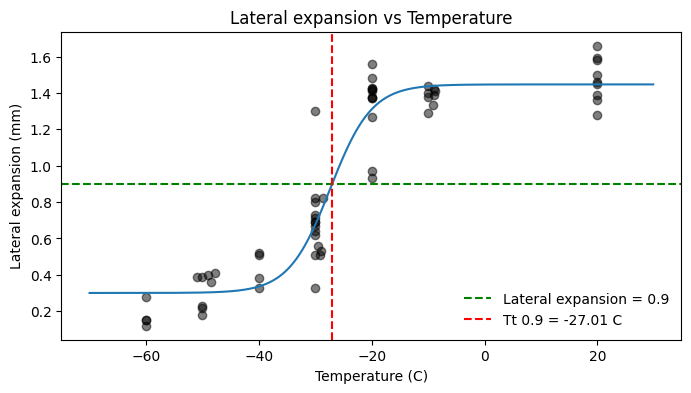

In [7]:
# Tt09 

# read excel file
df = pd.read_excel('Charpy_results_noNAN.xlsx', engine='openpyxl')
temperature = df['Temperature (C)'].to_numpy()
lateral = df['Lateral expansion (mm)'].to_numpy()

# Upper shelf temperature is taken slightly higher than 20C

tempRange = np.arange(-70, 30, 0.1)

a = 0.3002
b = 1.4472
c = -27.3487
d = 3.6759

lateralExpansionSTempCurve = Boltzmann(tempRange,a,b,c,d)

Tt09 = inverse_Boltzmann(0.9, a,b,c,d)
print(f"Tt09 is {Tt09} C")

plt.figure(figsize=(8, 4))
plt.scatter(temperature, lateral, color='k', marker='o', alpha=0.5)
plt.plot(tempRange, lateralExpansionSTempCurve)
plt.axhline(y=0.9, color='g', linestyle='--', label=f'Lateral expansion = 0.9')
plt.axvline(x=Tt09, color='r', linestyle='--', label=f'Tt 0.9 = {Tt09:.2f} C')

plt.legend(loc=4, frameon=False)
plt.title('Lateral expansion vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Lateral expansion (mm)')

Annex E Uncertainty

In [8]:
# The measurement equation for the mean absorbed energy KV
def E1(x_mean, Bv, Tx):
    KV_mean = x_mean - Bv - Tx
    return KV_mean

# The machine bias determined by indirect verification
def E2(KV_mean_v, KV_r):
    BV = KV_mean_v - KV_r
    return BV

# The uncertainty of x_mean, the mean observed absorbed energy of n test specimens
def E3(s_x, n):
    u_x_mean = s_x / np.sqrt(n)
    return u_x_mean

# corresponding uncertainty contribution of the machine resolution
def E4(r):
    u_r = r / np.sqrt(3)
    return u_r

# the combined standard uncertainty of the mean absorbed energy
def E5(u_x_mean, u_V, u_r):
    u_KV_mean = np.sqrt(u_x_mean**2 + u_V**2 + u_r**2)
    return u_KV_mean

# effective degrees of freedom of the uncertainty in mean absorbed energy
def E6(u_KV_mean, u_x_mean, v_x_mean, u_V, v_V):
    v_KV_mean = u_KV_mean ** 4 / (u_x_mean ** 4 / v_x_mean + u_V ** 4 / v_V)
    return v_KV_mean

# The expanded uncertainty of the mean absorbed energy
def E7(k, u_KV_mean):
    U_KV_mean = k * u_KV_mean
    return U_KV_mean

In [23]:
# read excel file
df = pd.read_excel('Charpy_results_combined.xlsx', engine='openpyxl')
temperature = df['Temperature (C)'].to_numpy()
energy = df['Impact Energy (J)'].to_numpy()

# Filter all absorbed energy where temp = 20C
energy20C = energy[temperature == 20]
print("Sample absorbed energy measurement at 20C:")
print(energy20C)
print()

n = len(energy20C)
print(f"Number of samples n: {n}\n")

x_mean = np.mean(energy20C)
print(f"Mean KV, x_mean: {x_mean}\n")

s_x = np.std(energy20C, ddof=1)
print(f"Standard deviation of n = {n}, s_x: {s_x}\n")

print("Standard uncertainty of the mean observed KV, u(x_mean)")
print("calculated according to Formula (E.3)\n")

u_x_mean = E3(s_x, n)

print(f"u(x_mean) = {u_x_mean}\n")

Sample absorbed energy measurement at 20C:
[183. 184. 161. 189. 167. 180. 184. 205. 168. 172.]

Number of samples n: 10

Mean KV, x_mean: 179.3

Standard deviation of n = 10, s_x: 12.824022596500505

Standard uncertainty of the mean observed KV, u(x_mean)
calculated according to Formula (E.3)

u(x_mean) = 4.055312017040804

